In [1]:
import helper_classes.DatabaseHelper as db_helper
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Get user, item and session data from the database:

In [2]:
user_item_session_data = db_helper.fetch_user_item_seq_info()

Create a dataframe which includes 'user_id' 'sequence_id' 'item_id'

In [3]:
user_item_seq_df = pd.DataFrame(user_item_session_data, columns=['user_id', 
                                                                 'session_id',
                                                                 'item_id'])
user_list_df = user_item_seq_df.sort_values(by=['user_id', 'session_id'], ignore_index=True)
user_list_df.head(5)

,user_id,session_id,item_id
0,0,1,0
1,596178,92,0
2,596178,92,0
3,715904,217,1432
4,715904,217,0


Some statistics:

In [4]:
print('User, Item, Seqeunce DataFrame size with item_id = 0 >> ' + str(user_item_seq_df.size))

User, Item, Seqeunce DataFrame size with item_id = 0 >> 213036


In [5]:
user_item_seq_df_no_zero = user_item_seq_df[user_item_seq_df['item_id'] > 0]
print('User, Item, Seqeunce DataFrame size without item_id = 0 >> ' + str(user_item_seq_df_no_zero.size))

User, Item, Seqeunce DataFrame size without item_id = 0 >> 96240


Unique numbers including item_id = 0

In [6]:
unique_users = user_item_seq_df['user_id'].unique()
unique_sessions = user_item_seq_df['session_id'].unique()
unique_items = user_item_seq_df['item_id'].unique()
print('Unique User Count: ' + str(unique_users.size))
print('Unique Session Count: ' + str(unique_sessions.size))
print('Unique Item Count: ' + str(unique_items.size))

Unique User Count: 32915
Unique Session Count: 599
Unique Item Count: 1523


Unique numbers excluding item_id = 0

In [7]:
unique_users = user_item_seq_df_no_zero['user_id'].unique()
unique_sessions = user_item_seq_df_no_zero['session_id'].unique()
unique_items = user_item_seq_df_no_zero['item_id'].unique()
print('Unique User Count: ' + str(unique_users.size))
print('Unique Session Count: ' + str(unique_sessions.size))
print('Unique Item Count: ' + str(unique_items.size))

Unique User Count: 17237
Unique Session Count: 456
Unique Item Count: 1522


Checking all time popular items

In [8]:
user_item_seq_df = user_item_seq_df_no_zero.copy() # Removing item_id = 0 for the rest of the notebook.

user_item_seq_df['times_clicked'] = user_item_seq_df.groupby('item_id')['item_id'].transform('count')
user_item_seq_df.sort_values(by='times_clicked', ascending=False)

,user_id,session_id,item_id,times_clicked
21494,3345651,1,6777,1698
28266,3351875,1,6777,1698
28376,3351958,1,6777,1698
28374,3351956,1,6777,1698
28373,3351955,1,6777,1698
...,...,...,...,...
29620,3353020,1,7080,1
28559,3352093,1,956,1
36323,3367879,1,6867,1
19538,3343701,1,101,1


In [9]:
pop_all_times = user_item_seq_df.drop_duplicates('item_id').sort_values(by='times_clicked', ascending=False).reset_index(drop=True)

print("""Most popular items of all times:
            1. item 6777 -> clicked 1698 times.
            2. item 6823 -> clicked 1256 times.
            3. item 4108 -> clicked 805 times.""")
pop_all_times.head()

Most popular items of all times:
            1. item 6777 -> clicked 1698 times.
            2. item 6823 -> clicked 1256 times.
            3. item 4108 -> clicked 805 times.


,user_id,session_id,item_id,times_clicked
0,2001469,5,6777,1698
1,1529905,695,6823,1256
2,1179818,81,4108,805
3,715904,236,4646,768
4,1529905,694,6990,551


In [10]:
user_item_seq_df.drop('times_clicked', axis=1, inplace=True)
user_item_seq_df.head(5)

,user_id,session_id,item_id
3,715904,224,5940
6,715904,225,6807
7,715904,225,6100
9,715904,225,6809
10,715904,225,6808


In [11]:
sequence_df = user_item_seq_df.groupby(['user_id','session_id']).agg(lambda x: list(map(str, x)))
sequence_df.rename(columns={'item_id':'item_sequence'}, inplace=True)
sequence_df.head(15)

item_sequence
user_id session_id                                                   
715904  217         [1432, 5932, 7070, 2200, 2201, 6198, 7078, 686...
        218         [5946, 5582, 5924, 7117, 5612, 5583, 3819, 382...
        219                                                    [7092]
        220         [5706, 5706, 2067, 725, 725, 2313, 2313, 2313,...
        221          [5710, 4710, 5709, 5708, 5714, 6908, 5715, 6971]
        222                                                    [7136]
        223                [7137, 7136, 5612, 5583, 5613, 1507, 5577]
        224                                                    [5940]
        225                            [6807, 6100, 6809, 6808, 6806]
        226                                        [6971, 5714, 3280]
        227                            [6627, 6632, 7134, 5710, 4710]
        228         [7026, 6247, 6247, 6247, 6247, 5692, 5646, 261...
        229         [5729, 592, 592, 592, 295, 295, 4645, 4645, 59...
        230         [7172, 7173, 7092, 7158, 7166, 6489, 7040, 716...
        231                            [6942, 6504, 6470, 5695, 5682]

In [12]:
sequence_df['sequence_length'] = sequence_df['item_sequence'].str.len()
sequence_df.head(10)

item_sequence  \
user_id session_id                                                      
715904  217         [1432, 5932, 7070, 2200, 2201, 6198, 7078, 686...   
        218         [5946, 5582, 5924, 7117, 5612, 5583, 3819, 382...   
        219                                                    [7092]   
        220         [5706, 5706, 2067, 725, 725, 2313, 2313, 2313,...   
        221          [5710, 4710, 5709, 5708, 5714, 6908, 5715, 6971]   
        222                                                    [7136]   
        223                [7137, 7136, 5612, 5583, 5613, 1507, 5577]   
        224                                                    [5940]   
        225                            [6807, 6100, 6809, 6808, 6806]   
        226                                        [6971, 5714, 3280]   

                    sequence_length  
user_id session_id                   
715904  217                      18  
        218                      23  
        219                       1  
        220                      67  
        221                       8  
        222                       1  
        223                       7  
        224                       1  
        225                       5  
        226                       3

In [13]:
sequence_df.sort_values(by='sequence_length', ascending=False, inplace=True)
sequence_df.head(10)

,,item_sequence,sequence_length
user_id,session_id,,
3293771,60,"[3838, 7183, 5709, 5709, 5712, 5712, 5711, 571...",109
1529905,706,"[6812, 7070, 6609, 6805, 6804, 7092, 6969, 680...",107
3293771,41,"[3341, 5711, 5712, 6943, 3282, 5669, 5678, 567...",99
3299140,15,"[5692, 7026, 2618, 5646, 6247, 3326, 7058, 569...",92
715904,230,"[7172, 7173, 7092, 7158, 7166, 6489, 7040, 716...",77
3238518,8,"[6609, 6802, 3840, 3127, 3966, 5238, 4646, 324...",69
715904,220,"[5706, 5706, 2067, 725, 725, 2313, 2313, 2313,...",67
3237109,63,"[6307, 3966, 49, 2505, 5238, 4646, 3678, 3857,...",58
1529905,721,"[7184, 632, 3391, 5704, 7075, 7075, 2384, 2384...",52


In [14]:
test = sequence_df[sequence_df['sequence_length'] > 1]
print("Mean Sequence Length for the sequences > 1: ", test.mean())

Mean Sequence Length for the sequences > 1:  sequence_length    3.581467
dtype: float64


In [15]:
print('After restricting sequences to have more than 1 item: ', len(test))

After restricting sequences to have more than 1 item:  4554


In [16]:
seq_len_VS_count = []
for i in range(sequence_df['sequence_length'][0] + 1):
    sq_len = (sequence_df[sequence_df['sequence_length'] == i])
    seq_sum = sq_len['sequence_length'].count()
    if seq_sum != 0:
        print('Sequence Length = ', i, ' >> Sequence Count: ', seq_sum)
        seq_len_VS_count.append([i, seq_sum])

Sequence Length =  1  >> Sequence Count:  15770
Sequence Length =  2  >> Sequence Count:  2397
Sequence Length =  3  >> Sequence Count:  900
Sequence Length =  4  >> Sequence Count:  442
Sequence Length =  5  >> Sequence Count:  252
Sequence Length =  6  >> Sequence Count:  159
Sequence Length =  7  >> Sequence Count:  117
Sequence Length =  8  >> Sequence Count:  64
Sequence Length =  9  >> Sequence Count:  65
Sequence Length =  10  >> Sequence Count:  33
Sequence Length =  11  >> Sequence Count:  25
Sequence Length =  12  >> Sequence Count:  19
Sequence Length =  13  >> Sequence Count:  13
Sequence Length =  14  >> Sequence Count:  14
Sequence Length =  15  >> Sequence Count:  4
Sequence Length =  16  >> Sequence Count:  8
Sequence Length =  17  >> Sequence Count:  4
Sequence Length =  18  >> Sequence Count:  2
Sequence Length =  19  >> Sequence Count:  4
Sequence Length =  20  >> Sequence Count:  3
Sequence Length =  22  >> Sequence Count:  1
Sequence Length =  23  >> Sequence Count

In [17]:
df = pd.DataFrame(data=seq_len_VS_count, columns=['total_item_number', 'total_sequence_count'])
df.head()

,total_item_number,total_sequence_count
0,1,15770
1,2,2397
2,3,900
3,4,442
4,5,252


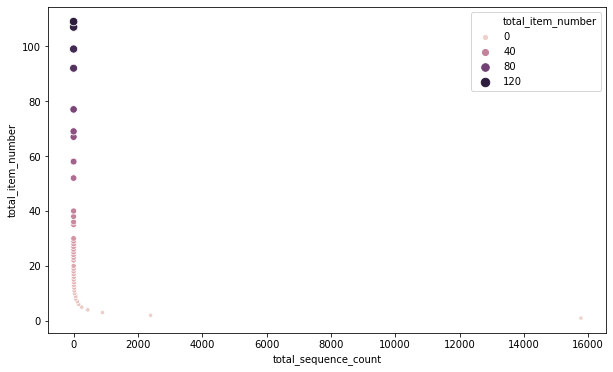

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sequence_count', y='total_item_number', data=df, hue='total_item_number', size='total_item_number')

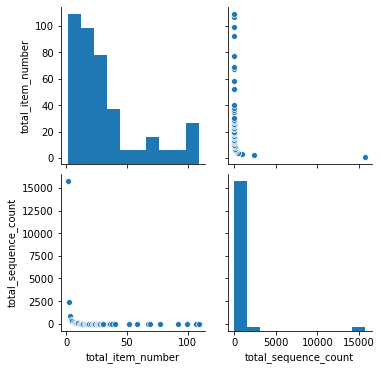

In [19]:
sns.pairplot(df)

In [20]:
seq_with_data = db_helper.fetch_user_item_seq_info_with_date()

In [21]:
seq_df = pd.DataFrame(data=seq_with_data, columns=['user_id', 'session_id', 'object_id', 'startTime', 'endTime'])

In [22]:
seq_df.head()

,user_id,session_id,object_id,startTime,endTime
0,0,1,0,2020-01-28 16:03:17,2020-02-25 15:56:36
1,596178,92,0,2020-02-06 09:24:02,2020-02-06 09:24:02
2,596178,92,0,2020-02-06 09:43:07,2020-02-06 09:58:19
3,715904,224,5940,2020-02-07 15:21:51,2020-02-07 16:32:41
4,715904,224,0,2020-02-07 16:30:02,2020-02-07 16:37:44


In [23]:
vanilla_df = seq_df.copy()
vanilla_df.head()

,user_id,session_id,object_id,startTime,endTime
0,0,1,0,2020-01-28 16:03:17,2020-02-25 15:56:36
1,596178,92,0,2020-02-06 09:24:02,2020-02-06 09:24:02
2,596178,92,0,2020-02-06 09:43:07,2020-02-06 09:58:19
3,715904,224,5940,2020-02-07 15:21:51,2020-02-07 16:32:41
4,715904,224,0,2020-02-07 16:30:02,2020-02-07 16:37:44


In [24]:
seq_df = vanilla_df.copy()
seq_df = seq_df[seq_df['object_id'] > 0].copy()
seq_df.head()

,user_id,session_id,object_id,startTime,endTime
3,715904,224,5940,2020-02-07 15:21:51,2020-02-07 16:32:41
6,715904,225,6807,2020-02-10 11:24:43,2020-02-10 12:54:22
7,715904,225,6100,2020-02-10 12:03:09,2020-02-10 12:54:13
9,715904,225,6809,2020-02-10 12:47:35,2020-02-10 12:54:37
10,715904,225,6808,2020-02-10 12:48:43,2020-02-10 12:54:13


In [25]:
# Add a new column 'timespent' which will show how long user spent on looking to one item
def calculate_time(start, end):
    if (end > start):
        return end - start
    else:
        None

In [26]:
seq_df['time_spent'] = np.vectorize(calculate_time)(seq_df['startTime'], seq_df['endTime'])

In [27]:
seq_df['seconds'] = seq_df['time_spent'].dt.total_seconds()

In [28]:
seq_df.head(15)

,user_id,session_id,object_id,startTime,endTime,time_spent,seconds
3,715904,224,5940,2020-02-07 15:21:51,2020-02-07 16:32:41,01:10:50,4250.0
6,715904,225,6807,2020-02-10 11:24:43,2020-02-10 12:54:22,01:29:39,5379.0
7,715904,225,6100,2020-02-10 12:03:09,2020-02-10 12:54:13,00:51:04,3064.0
9,715904,225,6809,2020-02-10 12:47:35,2020-02-10 12:54:37,00:07:02,422.0
10,715904,225,6808,2020-02-10 12:48:43,2020-02-10 12:54:13,00:05:30,330.0
11,715904,225,6806,2020-02-10 12:50:29,2020-02-10 12:54:38,00:04:09,249.0
12,715904,220,5706,2020-01-27 12:32:33,2020-01-27 15:48:59,03:16:26,11786.0
13,715904,220,5706,2020-01-27 12:32:40,2020-01-27 12:37:41,00:05:01,301.0
17,715904,220,2067,2020-01-27 13:18:01,2020-01-27 13:19:01,00:01:00,60.0
19,715904,220,725,2020-01-27 13:19:49,2020-01-27 14:20:25,01:00:36,3636.0


In [29]:
pd.options.display.float_format = '{:.0f}'.format
seq_df['seconds'].describe()

count     18484
mean       6053
std      102072
min           1
25%          30
50%          90
75%         360
max     4576651
Name: seconds, dtype: float64

In [30]:
print('Min time spent on item: >> ', seq_df['seconds'].min(), ' seconds.')
print('Mean time spent on item: >> ', seq_df['seconds'].mean(), ' seconds. >> 1.6 Hours')
print('Max time spent on item: >> ', seq_df['seconds'].max(), ' seconds. >> 1271 Hours. Not realistic')

Min time spent on item: >>  1.0  seconds.
Mean time spent on item: >>  6052.968621510496  seconds. >> 1.6 Hours
Max time spent on item: >>  4576651.0  seconds. >> 1271 Hours. Not realistic


In [31]:
seq_df2 = seq_df.sort_values(by='time_spent', ascending=False).copy()
seq_df2

,user_id,session_id,object_id,startTime,endTime,time_spent,seconds
4985,2724468,9,3126,2020-01-16 19:18:24,2020-03-09 18:35:55,52 days 23:17:31,4576651
444,883157,59,3126,2020-01-17 07:29:45,2020-02-29 08:42:56,43 days 01:13:11,3719591
8289,3000415,12,5932,2020-01-23 14:03:18,2020-03-06 11:55:12,42 days 21:51:54,3707514
8290,3000415,12,5932,2020-01-23 14:04:11,2020-03-06 11:54:54,42 days 21:50:43,3707443
6144,2833384,5,2191,2020-01-23 16:03:25,2020-03-05 11:00:05,41 days 18:56:40,3610600
...,...,...,...,...,...,...,...
70984,3417240,1,6259,2020-03-12 12:52:09,2020-03-12 12:52:09,NaT,nan
70993,3417244,1,4108,2020-03-12 13:03:02,2020-03-12 13:03:02,NaT,nan
70999,3417251,1,2331,2020-03-12 13:10:18,2020-03-12 13:10:18,NaT,nan
71004,3417257,1,156,2020-03-12 13:28:22,2020-03-12 13:28:22,NaT,nan


In [32]:
import datetime

t_up = pd.Timedelta(datetime.timedelta(hours=1, seconds=1))
t_low = pd.Timedelta(datetime.timedelta(seconds=3))

cut_df = seq_df2[seq_df2['time_spent'] < t_up].copy()
cut_df = cut_df[cut_df['time_spent'] > t_low].copy()

In [33]:
cut_df['seconds'].describe()

count   17503
mean      271
std       480
min         4
25%        30
50%        90
75%       278
max      3600
Name: seconds, dtype: float64

In [34]:
print('Min time spent on item: >> ', cut_df['seconds'].min(), ' seconds.')
print('Mean time spent on item: >> ', cut_df['seconds'].mean(), ' seconds.')
print('Max time spent on item: >> ', cut_df['seconds'].max(), ' seconds.')

Min time spent on item: >>  4.0  seconds.
Mean time spent on item: >>  271.26498314574644  seconds.
Max time spent on item: >>  3600.0  seconds.


In [35]:
# [Q4]
print('Min time spent on item: >> ', seq_df['seconds'].min(), ' seconds.')
print('Mean time spent on item: >> ', seq_df['seconds'].mean(), ' seconds. >> 1.6 Hours')
print('Max time spent on item: >> ', seq_df['seconds'].max(), ' seconds. >> 1271 Hours.')
print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
print('Min time spent on item: >> ', cut_df['seconds'].min(), ' seconds.')
print('Mean time spent on item: >> ', cut_df['seconds'].mean(), ' seconds.')
print('Max time spent on item: >> ', cut_df['seconds'].max(), ' seconds.')

Min time spent on item: >>  1.0  seconds.
Mean time spent on item: >>  6052.968621510496  seconds. >> 1.6 Hours
Max time spent on item: >>  4576651.0  seconds. >> 1271 Hours.
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Min time spent on item: >>  4.0  seconds.
Mean time spent on item: >>  271.26498314574644  seconds.
Max time spent on item: >>  3600.0  seconds.


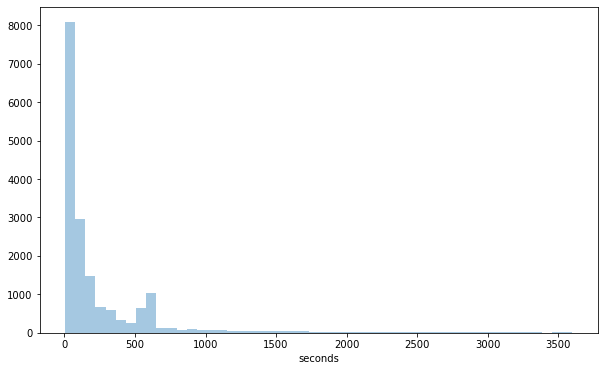

In [36]:
plt.figure(figsize=(10, 6))
sns.distplot(cut_df['seconds'], kde=False)
# norm_hist : bool, optional >> If True, the histogram height shows a density rather than a count.

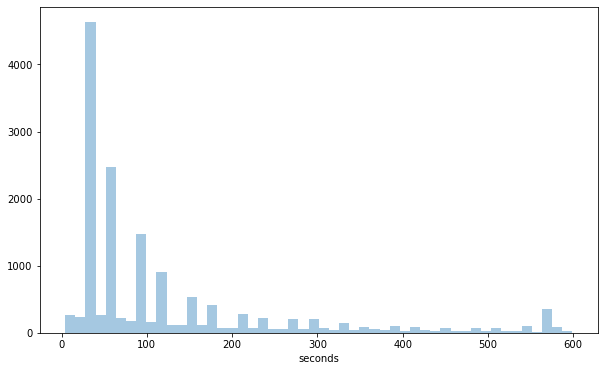

In [37]:
t_up = pd.Timedelta(datetime.timedelta(minutes=10))
t_low = pd.Timedelta(datetime.timedelta(seconds=3))

cut_df = seq_df2[seq_df2['time_spent'] < t_up].copy()
cut_df = cut_df[cut_df['time_spent'] > t_low].copy()

plt.figure(figsize=(10, 6))
sns.distplot(cut_df['seconds'], kde=False)

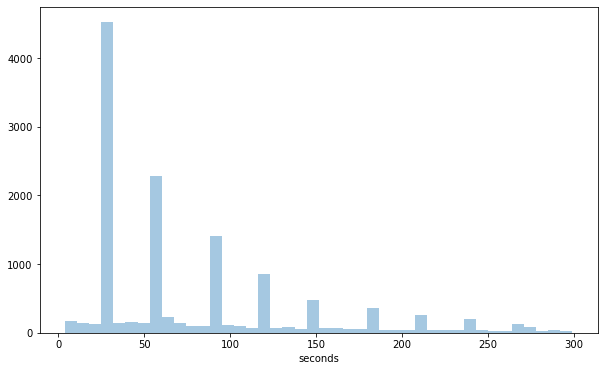

In [38]:
t_up = pd.Timedelta(datetime.timedelta(minutes=5))
t_low = pd.Timedelta(datetime.timedelta(seconds=3))

cut_df = seq_df2[seq_df2['time_spent'] < t_up].copy()
cut_df = cut_df[cut_df['time_spent'] > t_low].copy()

plt.figure(figsize=(10, 6))
sns.distplot(cut_df['seconds'], kde=False)